In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## When you first load the Netflix Movies and TV Shows dataset, what’s the very first thing you would do to understand its structure and contents?

In [4]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [5]:
df.shape

(8807, 12)

In [6]:
## We have around 8807 shows

In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
## We are looking for shows whose release year is from 1925 to 2021

In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
## We see that in our dataset we have missing values from director, cast, country, date_added, rating and duration columns 

In [12]:
## Most of the null values we see for the director column

## Given that the director column has the most missing values, how would you handle this issue? Would you drop the column, impute values, or take another approach — and why?

In [13]:
df['director'].isna().sum()

np.int64(2634)

In [14]:
percentage_of_missing_directors = (2634 * 100)/df.shape[0]

In [17]:
percentage_of_missing_directors = round(percentage_of_missing_directors, 0)

In [18]:
percentage_of_missing_directors

30.0

In [19]:
## We have about 30% missing values in the director column, so dropping this means loosing a significant amount of data

In [20]:
## We can replace the missing values with 'Missing'

In [21]:
df['director'] = df['director'].fillna('Missing')

In [22]:
df.isna().sum()

show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [23]:
df['cast'] = df['cast'].fillna('Missing')

In [24]:
df['country'] = df['country'].fillna('Missing')

In [25]:
df['date_added'] = df['date_added'].fillna('Missing')

In [26]:
df['rating'] = df['rating'].fillna('Missing')

In [27]:
df['duration'] = df['duration'].fillna('Missing')

## After handling missing values in the director column, how would you proceed to check for duplicates in the dataset? What steps would you take to identify and deal with them, and why is this important in EDA?

In [28]:
df_duplicates = df[df.duplicated()]

In [29]:
df_duplicates

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [30]:
## Checking duplicates is important so that we dont count the same row multiple times. It will cause inaccuracy in our further analysis

In [31]:
## From the steps we took, we see that there are no duplicates

## Now that you’ve handled missing values and checked for duplicates, how would you explore the distribution of Movies vs TV Shows in the dataset? What visualization would you use, and what kind of insights would you expect to gain from it?

In [32]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Missing,Missing,Missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [37]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [33]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [35]:
df_grouped_type = df.groupby(['type']).agg(total_shows = ('show_id', 'count'))

In [38]:
df_grouped_type['percentage_of_shows'] = (df_grouped_type['total_shows'] * 100) / df.shape[0]

In [40]:
df_grouped_type['percentage_of_shows'] = df_grouped_type['percentage_of_shows'].round(2)

In [41]:
df_grouped_type

,total_shows,percentage_of_shows
type,,
Movie,6131,69.62
TV Show,2676,30.38


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

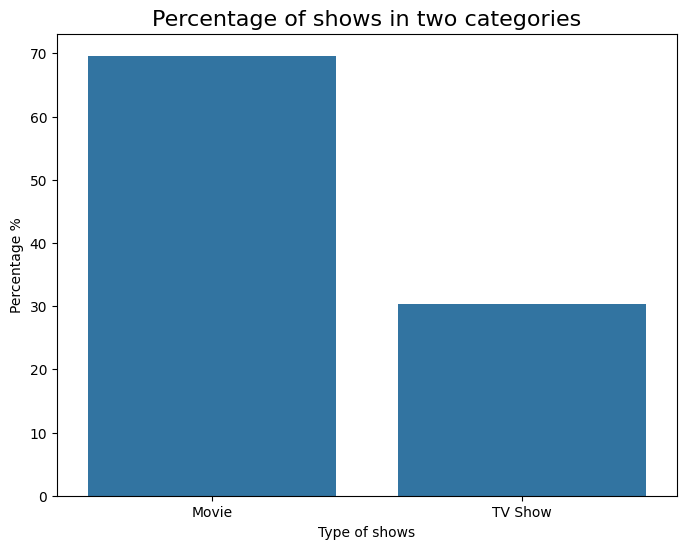

In [46]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Percentage of shows in two categories', fontsize = 16)
ax.set_xlabel('Type of shows')
ax.set_ylabel('Percentage %')
sns.barplot(x = df_grouped_type.index, y = df_grouped_type['percentage_of_shows'], data = df_grouped_type)
plt.show()

In [47]:
## We have used a barplot to visualize the percentage of shows of type Movie to that of TV shows. We see that the percentage of Movie shows are more than that of TV show

## After analyzing Movies vs TV Shows, how would you explore the trend of content added over time? Specifically, what steps would you take to visualize how Netflix’s catalog has grown year by year, and what insights would you expect to uncover from that visualization?

In [48]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Missing,Missing,Missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [211]:
df_date = df[~(df['date_added'] == 'Missing')].copy()

In [212]:
df_date['date'] = pd.to_datetime(df_date['date_added'], format = 'mixed')

In [58]:
df_date.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,Missing,Missing,Missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,Missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24


In [59]:
df_date_movie = df_date[df_date['type'] == 'Movie']

In [60]:
df_date_tv = df_date[df_date['type'] == 'TV Show']

In [62]:
df_movie_counts = df_date_movie.groupby(['date']).agg(movie_counts = ('show_id', 'count'))

In [63]:
df_tv_counts = df_date_tv.groupby(['date']).agg(tv_counts = ('show_id', 'count'))

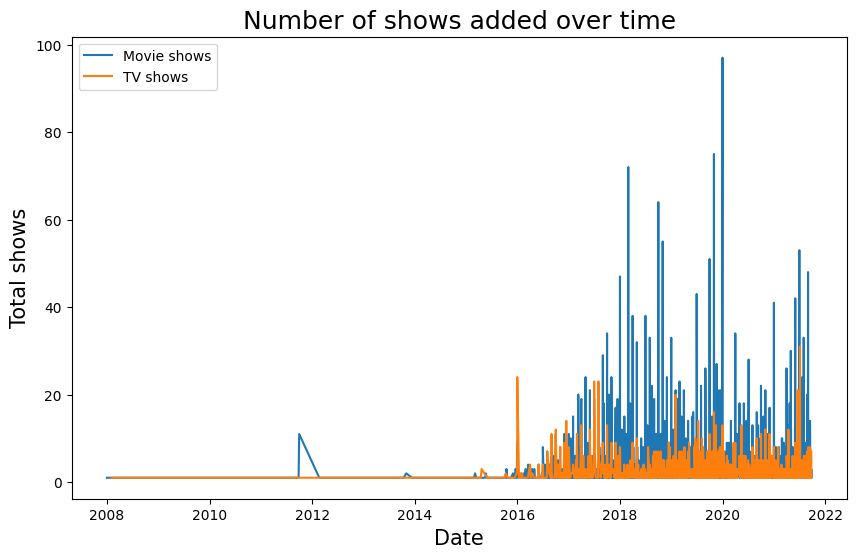

In [68]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('Number of shows added over time', fontsize = 18)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Total shows', fontsize = 15)
sns.lineplot(x = df_movie_counts.index, y = 'movie_counts', data = df_movie_counts, label = 'Movie shows')
sns.lineplot(x = df_tv_counts.index, y = 'tv_counts', data = df_tv_counts, label = 'TV shows')
plt.legend()
plt.show()

In [69]:
## From the above graph , we see that the shows of type Movie have shown an increasing trend over time. It spiked the highest in the end of 2019 to beginning of 2020
## Shows of type TV, shows consistent trend from 2017 to 2022.

## After analyzing content trends over time, how would you explore the top countries contributing content to Netflix? What steps would you take to visualize this, and what kind of insights would you expect to uncover?

In [187]:
df_date.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Missing,Missing,Missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [188]:
df_date['country'] = df_date['country'].str.split(',')

In [190]:
df_date['country'] = df_date['country'].apply(lambda x : [country.strip() for country in x])

In [191]:
df_date.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,[United States],"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",[Missing],"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Missing,Missing,[Missing],"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [192]:
df_country_split = df_date.explode('country').copy()

In [193]:
df_grouped = df_country_split.groupby(['country']).agg(total_shows = ('show_id', 'count'))

In [194]:
df_grouped.sort_values(['total_shows'], ascending = False, inplace = True)

In [195]:
df_grouped.head()

,total_shows
country,
United States,3684
India,1046
Missing,830
United Kingdom,805
Canada,445


In [196]:
df_top10_countries = df_grouped[:10]

In [197]:
df_top10_countries

,total_shows
country,
United States,3684
India,1046
Missing,830
United Kingdom,805
Canada,445
France,393
Japan,317
Spain,232
South Korea,231


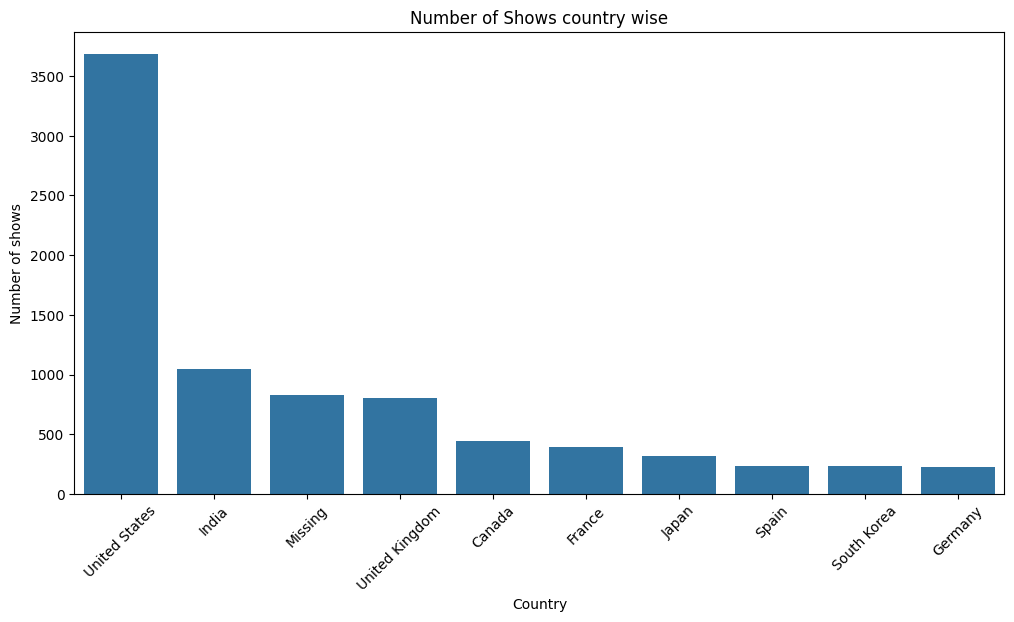

In [198]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_title('Number of Shows country wise')
ax.set_xlabel('Country')
ax.set_ylabel('Number of shows')
sns.barplot(x = df_top10_countries.index, y = df_top10_countries['total_shows'], data = df_top10_countries)
plt.xticks(rotation = 45)
plt.show()

In [199]:
## From the graph above, insight collected is United States contributes the highest shows, followed by India, UK, Canada, France ..

## Now that you’ve identified the top contributing countries, how would you move into statistical inference? For example, if I asked you to test whether Netflix adds significantly more Movies than TV Shows, what statistical method would you use, and how would you set up that test?

In [200]:
## Ho = Number of Movie shows = Number of TV shows

In [201]:
## Ha = Number of Movie shows > Number of TV shows

In [203]:
## Can you tell me the significance level that I should take in consideration to proceed ?

## For your Netflix dataset case, since this is exploratory EDA rather than high-stakes decision-making, 
## 𝛼 = 0.05 is the most reasonable choice.
## Given your hypotheses and chosen significance level, which statistical test would you apply to check if the number of Movies is significantly greater than the number of TV Shows, and why?

In [209]:
df_date.shape

(8797, 12)

In [214]:
n = df_date.shape[0] ## Number of observations

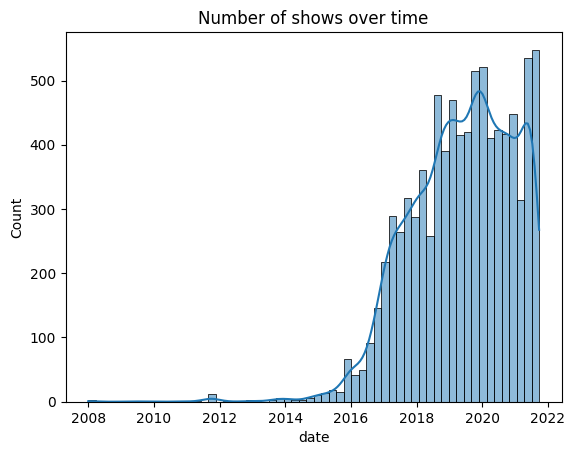

In [218]:
sns.histplot(x = 'date', data = df_date, kde = True).set_title('Number of shows over time')
plt.show()

In [219]:
## From the above graph we see that the distribution of the number of shows is a left skewed. Since its not normally distributed, we can go for t-test

## you want a one-sided test (Movies > TV Shows), you could use a one-proportion Z-test comparing the observed proportion of Movies against 0.5.

In [220]:
## Ho = proportion of Movies = 0.5

In [257]:
## Ha = proportion of Movies > 0.5

In [264]:
po = 0.5

In [258]:
alpha = 0.05

In [266]:
n = df_date.shape[0]

In [260]:
proportion_of_movies = (df_date[df_date['type'] == 'Movie'].shape[0]/df_date.shape[0])

In [262]:
proportion_of_movies = round(proportion_of_movies, 2)

In [263]:
proportion_of_movies

0.7

In [267]:
## z_obs = (proportion_of_movies - po)/sqrt(po * (1 - po)/n)

In [268]:
divisor = math.sqrt((po * (1 - po))/n)

In [269]:
divisor

0.005330926667029721

In [270]:
z_obs = (proportion_of_movies - po) /divisor

In [271]:
z_obs

37.51692951188835

In [272]:
## alpha is 0.05, the z_critical = 1.96

In [273]:
## z_obs > z_critical, so we reject the null hypothesis

## Suppose now we want to test whether the average duration of Movies differs significantly across countries. How would you set up that test — which statistical method would you choose, and why?

In [274]:
df_date.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,Missing,Missing,Missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,Missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24


In [276]:
## Ho = average duration of movies do not differ
## H1 = average duration of movies differ

In [277]:
## Since we have multiple countries, the appropriate method is a one‑way ANOVA (or a nonparametric alternative).

## Can you analyze the genre popularity in the dataset? Specifically, how would you wrangle the listed_in column (which contains multiple genres per show) and then visualize the top 10 genres overall?

In [278]:
df_date.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,Missing,Missing,Missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,Missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24


In [279]:
df_date['listed_in'] = df_date['listed_in'].apply(lambda x : x.split(','))

In [282]:
df_genre = df_date.explode('listed_in').copy()

In [285]:
df_genre['listed_in'] = df_genre['listed_in'].str.strip()

In [286]:
df_genre['listed_in'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [289]:
df_grouped_genre = df_genre.groupby(['listed_in']).agg(total_shows = ('show_id', 'count'))

In [291]:
df_grouped_genre.sort_values(['total_shows'], ascending = False, inplace = True)

In [292]:
df_grouped_genre.head()

,total_shows
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1350
Documentaries,869


In [293]:
top_10_genre = df_grouped_genre[: 10]

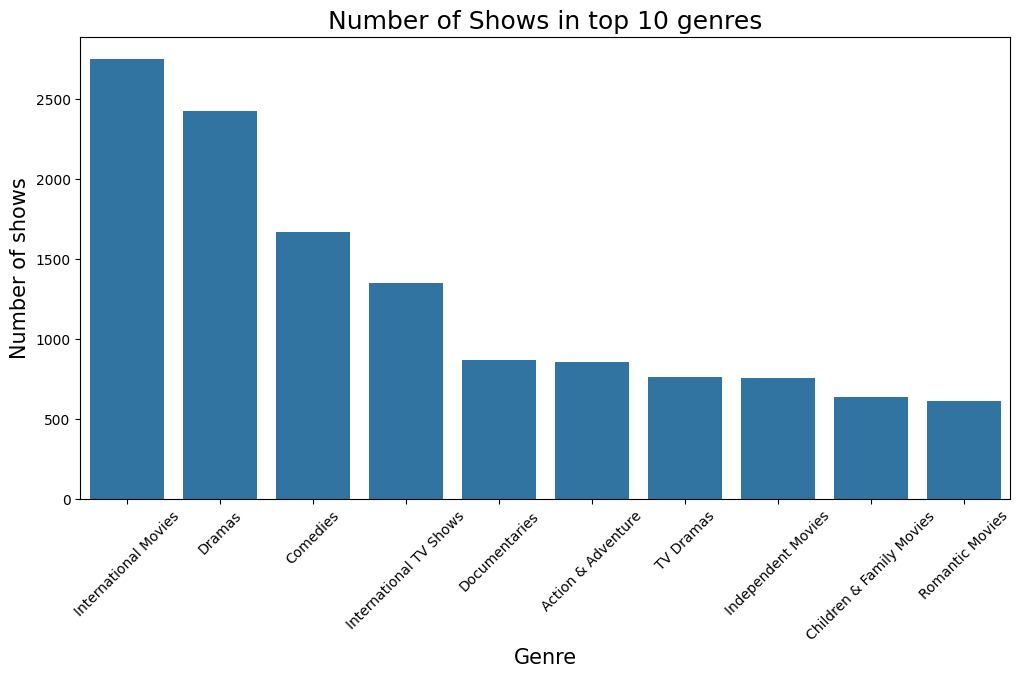

In [299]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_title('Number of Shows in top 10 genres', fontsize = 18)
ax.set_xlabel('Genre', fontsize = 15)
ax.set_ylabel('Number of shows', fontsize = 15)
sns.barplot(x = top_10_genre.index, y = top_10_genre['total_shows'], data = top_10_genre)
plt.xticks(rotation = 45)
plt.show()

In [300]:
## From the graph, the insight we get is that international movies has the maximum shows, followed by Dramas, comedies, internation tv shows, documentaries ....

## Can you analyze the ratings distribution (like TV‑MA, PG, R, etc.) and show how these ratings differ between Movies and TV Shows?

In [302]:
df_date.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",2021-09-24


In [303]:
df_ratings = df_date.pivot_table(
                                 index = 'rating',
                                 columns = 'type',
                                 values = 'show_id',
                                 aggfunc = 'count',
                                 fill_value = 0
                                )

In [306]:
df_ratings.sort_values(['Movie', 'TV Show'], ascending = False, inplace = True)

In [307]:
df_ratings.head()

type,Movie,TV Show
rating,,
TV-MA,2062,1143
TV-14,1427,730
R,797,2
TV-PG,540,321
PG-13,490,0


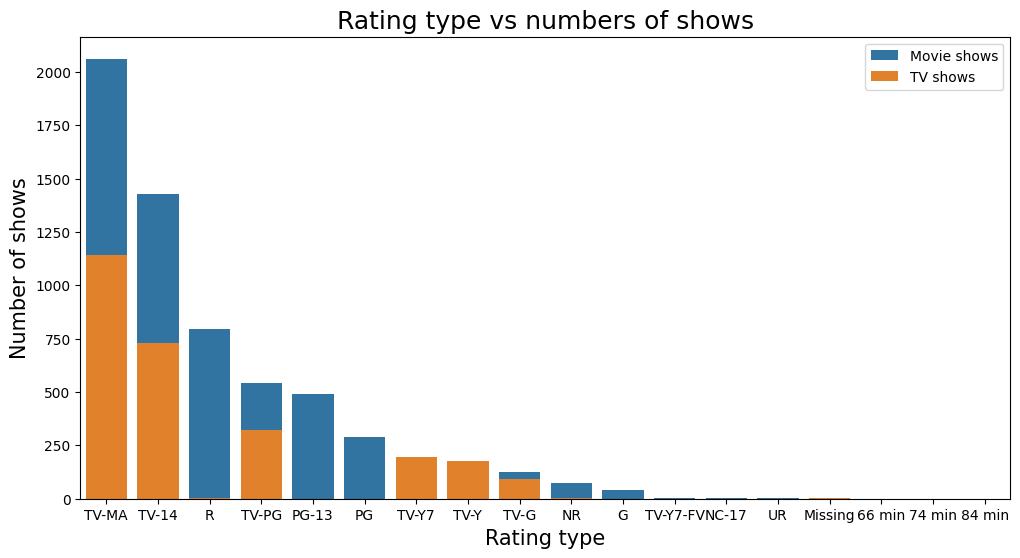

In [319]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_title('Rating type vs numbers of shows', fontsize = 18)
ax.set_xlabel('Rating type', fontsize = 15)
ax.set_ylabel('Number of shows', fontsize = 15)
sns.barplot(x = df_ratings.index, y = df_ratings['Movie'], data = df_ratings, label = 'Movie shows')
sns.barplot(x = df_ratings.index, y = df_ratings['TV Show'], data = df_ratings, label = 'TV shows')
ax.legend()
plt.show()

In [318]:
## For the Rating Type, TV-MA shows the highest number of shows, out of which movies is higher than tv shows
## Then comes the other rating, like TV-14, R, TV-PG...........

## Can you analyze the seasonality of content additions — for example, by grouping shows by the month they were added — and see if Netflix tends to add more content in certain months of the year?

In [320]:
df_date.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,Missing,Missing,Missing,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,Missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,2021-09-24


In [354]:
df_date['month'] = df_date['date'].dt.month_name()

In [356]:
df_grouped_month = df_date.groupby(['month']).agg(total_shows = ('show_id', 'count'))

In [357]:
df_grouped_month.sort_values(['total_shows'], ascending = False, inplace = True)


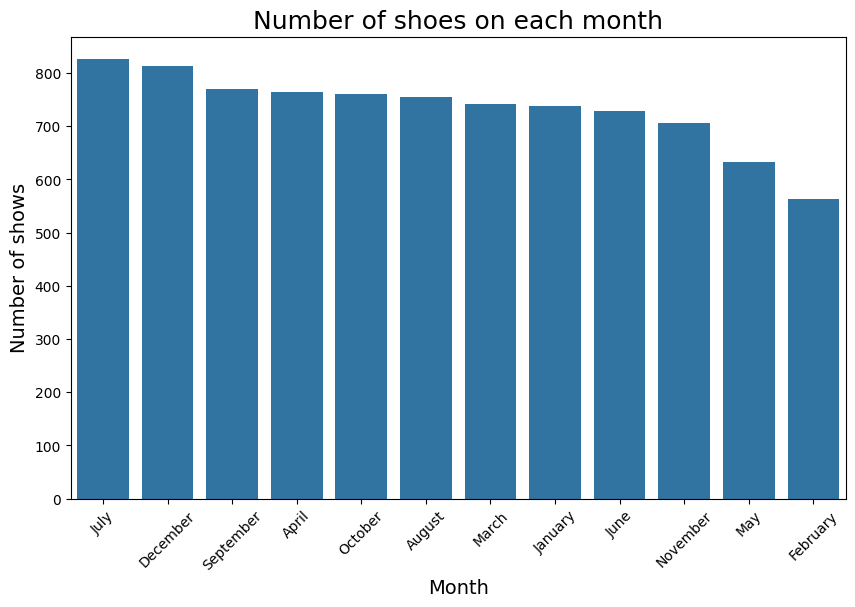

In [359]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('Number of shoes on each month', fontsize = 18)
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('Number of shows', fontsize = 14)
sns.barplot(x = df_grouped_month.index, y = df_grouped_month['total_shows'], data = df_grouped_month)
plt.xticks(rotation = 45)
plt.show()

In [360]:
## We see in July the number of shows added is the maximum, followed by December then September. But we see that there is not very significant difference between the number of shows of two months

## Can you analyze the director or actor frequency — for example, by exploding the cast column and identifying the most common actors or directors in the dataset?

In [361]:
df_date.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021-09-25,September
1,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",2021-09-24,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,2021-09-24,September
3,s4,TV Show,Jailbirds New Orleans,Missing,Missing,Missing,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",2021-09-24,September
4,s5,TV Show,Kota Factory,Missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,2021-09-24,September


In [362]:
df_date['cast'] = df_date['cast'].apply(lambda x : x.split(','))

In [363]:
df_cast = df_date.explode('cast').copy()

In [365]:
df_cast['cast'] = df_cast['cast'].str.strip()

In [366]:
df_cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021-09-25,September
1,s2,TV Show,Blood & Water,Missing,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",2021-09-24,September
1,s2,TV Show,Blood & Water,Missing,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",2021-09-24,September
1,s2,TV Show,Blood & Water,Missing,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",2021-09-24,September
1,s2,TV Show,Blood & Water,Missing,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",2021-09-24,September


In [368]:
df_grouped_cast = df_cast.groupby(['cast']).agg(total_shows = ('show_id', 'count'))
df_grouped_cast.sort_values(['total_shows'], ascending = False, inplace = True)

In [373]:
top_10_cast = df_grouped_cast[1: 11]
top_10_cast

,total_shows
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30
Yuki Kaji,29


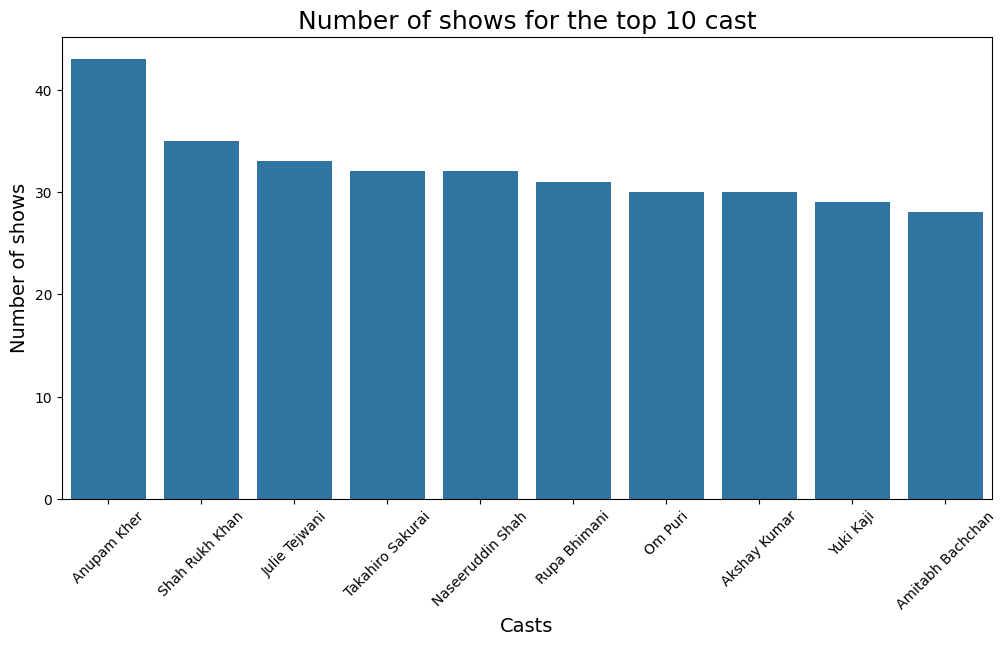

In [376]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_title('Number of shows for the top 10 cast', fontsize = 18)
ax.set_xlabel('Casts', fontsize = 14)
ax.set_ylabel('Number of shows', fontsize = 14)
sns.barplot(x = top_10_cast.index, y = top_10_cast['total_shows'], data = top_10_cast)
plt.xticks(rotation = 45)
plt.show()

In [377]:
## From the insights that we gathered, we saw that Anupam kher has the highest number of shows, followed by Shah Rukh Khan, Julie tejwani, Takahiro Sakurai ..........